# **Project Name**    - Travel Recommendation Model



##### **Project Type**    - Productionization of ML Systems
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Productionization_of_ML_Systems.git

# Project Title:
**Voyage Analytics: Integrating MLOps in Travel
Productionization of ML Systems**



## Business Context

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

## Brief overview of each datasets
#### **Users Dataset:**
- code: User identifier.
- company: Associated company.
- name: Name of the user.
- gender: Gender of the user.
- age: Age of the user.

#### **Flights Dataset:**
- travelCode: Identifier for the travel.
- userCode: User identifier(linked to the Users dataset)
- from: Origin of the flight.
- to: Destination of the flight.
- flightType: Type of flight (e.g., first class).
- price: Price of the flight.
- time: Flight duration.
- distance: Distance of the flight.
- agency: Flight agency.
- date: Date of the flight.

#### **Hotels Dataset:**
- travelCode: Identifier for the travel, similar to the Flights dataset.
- userCode: User identifier(linked to the Users dataset)
- name: Name of the hotel.
- place: Location of the hotel.
- days: Number of days of the hotel stay.
- price: Price per day.
- total: Total price for the stay.
- date: Date of the hotel booking.

## Project Objectives
Build a recommendation model to provide hotel suggestions based on user preferences and historical data.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/"

!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip
  inflating: flights.csv             
  inflating: hotels.csv              
  inflating: users.csv               


In [3]:
# Load Dataset
hotels_dataset = pd.read_csv("/content/hotels.csv", parse_dates=['date'])

### Dataset First View

In [4]:
# Dataset First Look
hotels_dataset.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,2019-11-14
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,2019-12-12
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,2019-12-26


In [5]:
hotels_dataset.tail()

,travelCode,userCode,name,place,days,price,total,date
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,2020-06-18
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,2020-06-25
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,2020-07-02
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,2020-07-09
40551,135942,1339,Hotel BD,Natal (RN),4,242.88,971.52,2020-07-16


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Total number of rows: {hotels_dataset.shape[0]}")
print(f"Total number of columns: {hotels_dataset.shape[1]}")

Total number of rows: 40552
Total number of columns: 8


### Dataset Information

In [7]:
# Dataset Info
hotels_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   travelCode  40552 non-null  int64         
 1   userCode    40552 non-null  int64         
 2   name        40552 non-null  object        
 3   place       40552 non-null  object        
 4   days        40552 non-null  int64         
 5   price       40552 non-null  float64       
 6   total       40552 non-null  float64       
 7   date        40552 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.5+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
hotels_dataset.duplicated().value_counts()

,count
False,40552


In this dataset not present any duplicate row.


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
hotels_dataset.isna().sum()

,0
travelCode,0
userCode,0
name,0
place,0
days,0
price,0
total,0
date,0


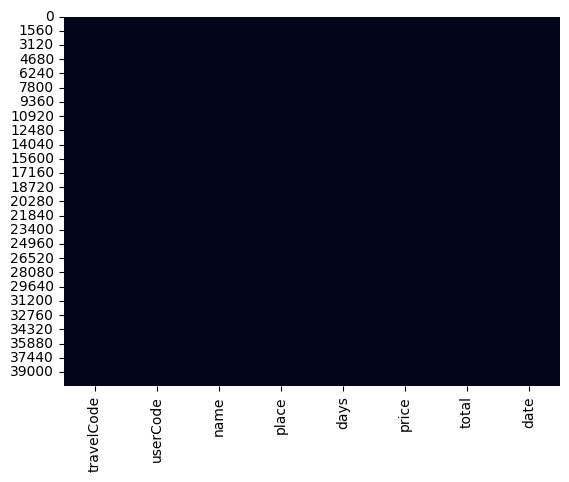

In [10]:
# Visualizing the missing values
sns.heatmap(hotels_dataset.isna(), cbar=False)
plt.show()

### What did you know about your dataset?

This dataset contains no duplicate rows and no missing values.  

**Dataset Summary:**  
- **Total Rows:** 40552
- **Total Columns:** 8

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(f"Dataset all columns name: {list(hotels_dataset.columns)} \n")
hotels_dataset.info()

Dataset all columns name: ['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total', 'date'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   travelCode  40552 non-null  int64         
 1   userCode    40552 non-null  int64         
 2   name        40552 non-null  object        
 3   place       40552 non-null  object        
 4   days        40552 non-null  int64         
 5   price       40552 non-null  float64       
 6   total       40552 non-null  float64       
 7   date        40552 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.5+ MB


In [12]:
# Dataset Describe
hotels_dataset.describe()

,travelCode,userCode,days,price,total,date
count,40552.000000,40552.000000,40552.000000,40552.000000,40552.000000,40552
mean,67911.794461,666.963726,2.499679,214.439554,536.229513,2021-01-10 05:22:32.219372544
min,0.000000,0.000000,1.000000,60.390000,60.390000,2019-09-26 00:00:00
25%,33696.750000,323.000000,1.000000,165.990000,247.620000,2020-04-02 00:00:00
50%,67831.000000,658.000000,2.000000,242.880000,495.240000,2020-11-12 00:00:00
75%,102211.250000,1013.000000,4.000000,263.410000,742.860000,2021-09-09 00:00:00
max,135942.000000,1339.000000,4.000000,313.020000,1252.080000,2023-07-13 00:00:00
std,39408.199333,391.136794,1.119326,76.742305,319.331482,NaN


In [13]:
hotels_dataset.describe(include=['object'])

,name,place
count,40552,40552
unique,9,9
top,Hotel K,Salvador (BH)
freq,5094,5094


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
hotels_dataset.nunique()

,0
travelCode,40552
userCode,1310
name,9
place,9
days,4
price,9
total,36
date,199


In [15]:
# Unique Values for ['name','place','days','price'] variable
column_list = ['name','place','days','price']
for column_name in column_list:
  print(f"the unique values from column_name:'{column_name}' is \n {hotels_dataset[column_name].unique()} \n")

the unique values from column_name:'name' is 
 ['Hotel A' 'Hotel K' 'Hotel BD' 'Hotel Z' 'Hotel AU' 'Hotel AF' 'Hotel BW'
 'Hotel CB' 'Hotel BP'] 

the unique values from column_name:'place' is 
 ['Florianopolis (SC)' 'Salvador (BH)' 'Natal (RN)' 'Aracaju (SE)'
 'Recife (PE)' 'Sao Paulo (SP)' 'Campo Grande (MS)' 'Rio de Janeiro (RJ)'
 'Brasilia (DF)'] 

the unique values from column_name:'days' is 
 [4 2 3 1] 

the unique values from column_name:'price' is 
 [313.02 263.41 242.88 208.04 312.83 139.1   60.39 165.99 247.62] 



In [16]:
hotels_dataset['name'].value_counts(normalize=True)

,proportion
name,
Hotel K,0.125616
Hotel CB,0.124014
Hotel BD,0.119082
Hotel AF,0.119057
Hotel AU,0.110155
Hotel BP,0.109415
Hotel BW,0.106850
Hotel Z,0.103694
Hotel A,0.082117


In [17]:
hotels_dataset['place'].value_counts(normalize=True)

,proportion
place,
Salvador (BH),0.125616
Rio de Janeiro (RJ),0.124014
Natal (RN),0.119082
Sao Paulo (SP),0.119057
Recife (PE),0.110155
Brasilia (DF),0.109415
Campo Grande (MS),0.106850
Aracaju (SE),0.103694
Florianopolis (SC),0.082117


In [18]:
# checking start and end date in this dataset
print(f"start date in dataset ---> {hotels_dataset['date'].min()}")
print(f"last date in dataset ---> {hotels_dataset['date'].max()}")

start date in dataset ---> 2019-09-26 00:00:00
last date in dataset ---> 2023-07-13 00:00:00


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.
# created new variables from date columns
hotels_dataset['year'] = hotels_dataset['date'].dt.year
hotels_dataset['month'] = hotels_dataset['date'].dt.month
hotels_dataset['day'] = hotels_dataset['date'].dt.day
hotels_dataset['year_index'] = hotels_dataset['year'] - hotels_dataset['date'].min().year

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

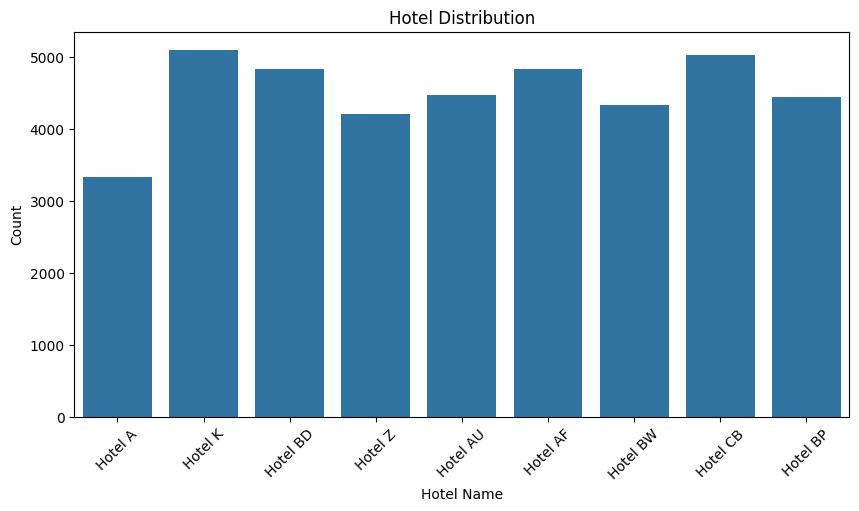

In [20]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=hotels_dataset, x='name')
plt.title('Hotel Distribution')
plt.xlabel('Hotel Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Chart - 2

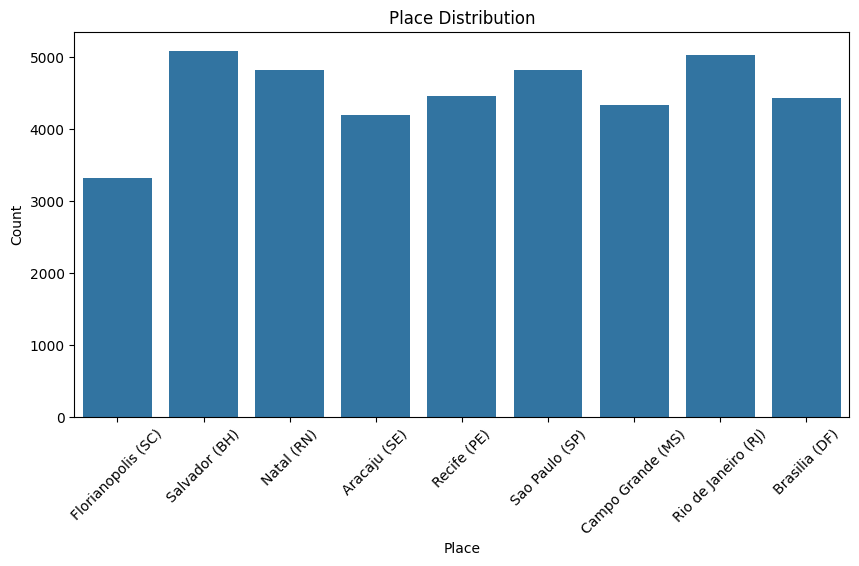

In [21]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=hotels_dataset, x='place')
plt.title('Place Distribution')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Chart - 3

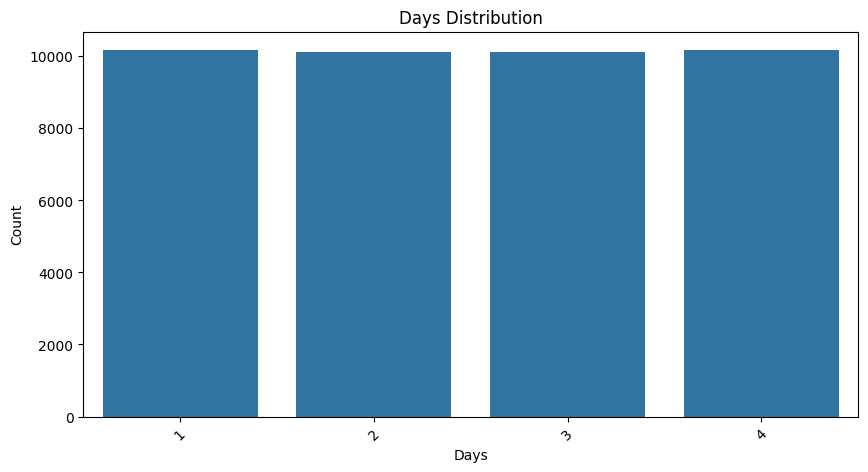

In [22]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(data=hotels_dataset, x='days')
plt.title('Days Distribution')
plt.xlabel('Days')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Chart - 4

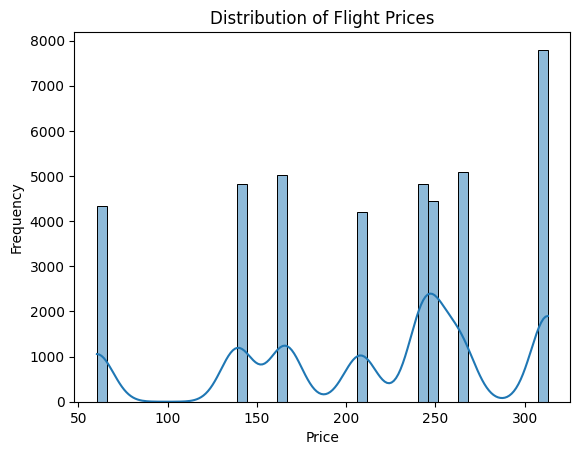

In [23]:
# Chart - 4 visualization code
sns.histplot(data=hotels_dataset, x='price', kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# ***Deployment***

In [24]:
!pip install -q gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.sparse.linalg import svds
import gradio as gr

In [26]:
# Encode hotel names
label_encoder = LabelEncoder()
hotels_dataset['name_encoded'] = label_encoder.fit_transform(hotels_dataset['name'])

In [27]:
# Aggregate duplicates by calculating the mean price for each (userCode, name_encoded) pair
df_aggregated = hotels_dataset.groupby(['userCode', 'name_encoded'], as_index=False).agg({'price': 'mean'})

# user-hotel interaction matrix
interaction_matrix = df_aggregated.pivot(index='userCode', columns='name_encoded', values='price').fillna(0)

# Matrix factorization using SVD
U, sigma, Vt = svds(interaction_matrix.values, k=8)
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predicted_ratings, columns=interaction_matrix.columns, index=interaction_matrix.index)

# Recommendation function
def recommend_hotels(user_id, top_n=5):
    try:
        print(f"Received User ID: {user_id}")
        if user_id not in predictions_df.index:
            return "User ID not found in the dataset."

        # Get top N hotel recommendations
        sorted_hotels = predictions_df.loc[user_id].sort_values(ascending=False).head(top_n)
        print(f"Sorted Hotels: {sorted_hotels}")

        # Extract hotel names
        recommended_hotels = hotels_dataset[hotels_dataset['name_encoded'].isin(sorted_hotels.index)][['name']].drop_duplicates()
        hotel_names = recommended_hotels['name'].tolist()
        print(f"Recommended Hotel Names: {hotel_names}")

        if hotel_names:
            return '\n'.join(hotel_names)
        else:
            return "No recommendations available for this user."
    except Exception as e:
        return f"Error in recommendation: {str(e)}"


def get_popular_hotels():
    popular_hotels = hotels_dataset['name'].value_counts().head(10)
    return popular_hotels.index.tolist(), popular_hotels.values.tolist()

# Define Gradio components
def gradio_interface(user_id):
    try:
        user_id = int(user_id)
        recommendations = recommend_hotels(user_id)

        # Popular hotels
        hotel_names, booking_counts = get_popular_hotels()
        return recommendations, hotel_names, booking_counts
    except ValueError:
        return "Invalid User ID. Please enter a numeric value.", [], []

# Gradio app layout
with gr.Blocks() as app:
    gr.Markdown("# Hotel Recommendation System")
    gr.Markdown("Personalized hotel recommendations based on historical booking data.")

    with gr.Row():
        user_input = gr.Number(label="Enter User ID (Numeric)", value=0)
        recommend_button = gr.Button("Get Recommendations")

    # output components
    recommendation_output = gr.Textbox(label="Recommended Hotels", lines=5)
    popular_hotels_df = gr.DataFrame(
        label="Top 10 Popular Hotels",
        headers=["Hotel Name", "Number of Bookings"],
        interactive=False,
    )

    def on_recommend(user_id):
        recommendations, hotel_names, booking_counts = gradio_interface(user_id)

        df_data = list(zip(hotel_names, booking_counts))
        return recommendations, df_data

    # Connect the button to the recommendation function
    recommend_button.click(
        on_recommend,
        inputs=user_input,
        outputs=[recommendation_output, popular_hotels_df]
    )

app.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8585ab1c276ae6f7fb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Received User ID: 0
Sorted Hotels: name_encoded
2    312.843594
0    312.612595
7    263.779997
4    248.075037
3    243.441666
Name: 0, dtype: float64
Recommended Hotel Names: ['Hotel A', 'Hotel K', 'Hotel BD', 'Hotel AU', 'Hotel BP']
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://8585ab1c276ae6f7fb.gradio.live
